# The Integral Test and Remainder Estimate
Finding whether or not a series converges is often quite useful, and being able to bound the distance between a specific partial sum of the series and the actual sum of the series can also be an incredibly useful tool. For sums that are integrable and match some other conditions, the integral test is able to show whether or not a series converges and also give a bound on the remainder which can somewhat trivially be turned into an error bound.

### The Integral Test
The integral test allows us to determine whether or not a series converges. Suppose we have the following series:
$$\sum_{n=N}^{\infty}a_n$$
and that we denote $f(n)=a_n$. If we know that $f(n)$ is continuous, positive, and decreasing (only needs to be so for $n>N$), then we can say that the sum above and the following integral:
$$\int_{N}^{\infty}f(n)dn$$
both converge or diverge. This means that we can easily determine the convergence of any integrable function, assuming it meets the conditions listed above after a certain point (We can get around the conditions by starting the sum later, assuming that we can calculate the partial sum).

### Proof(ish)/Intuition for the Integral Test
Let's start off by considering the graph of a function that is continuous, positive, and decreasing (something like $f(x)=\frac{1}{x^2}$, and the rectangles, the sum of the areas of whom constitutes the sum that we're interested in calculating, namely $\sum_{n=1}^{\infty}\frac{1}{x^2}$:

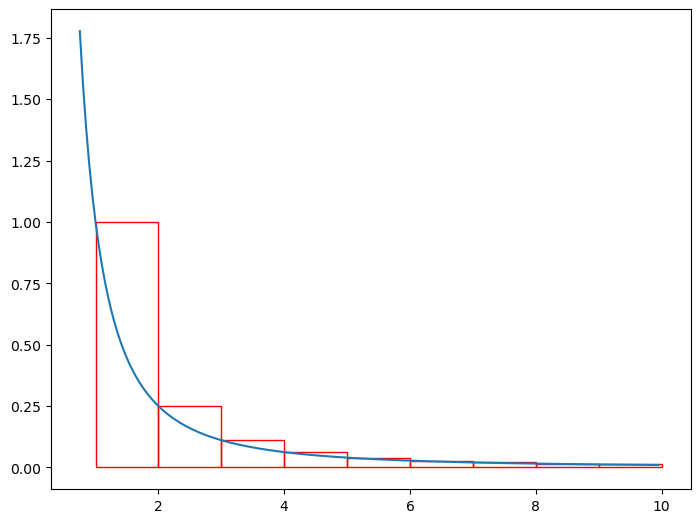

In [38]:
from matplotlib import pyplot, patches
import numpy
import math

fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

f = lambda u: 1 / u ** 2

for i in range(1, 10):
    rect = patches.Rectangle((i, 0), 1, f(i), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

x = numpy.arange(0.75, 10, 0.05)
ffun = numpy.vectorize(f)
y = ffun(x)
ax.plot(x, y)

The rectangles in the image above all have a width of 1, and their height is set to the value of the function at their left hand side. The total area of the rectangles composes the sum $\sum_{n=1}^{\infty}\frac{1}{x^2}$ as mentioned before. It is clear from this photo that in this specific case (and every case since the function will always be continuous, decreasing, and positive based on the presuppositions), the area of the rectangles is greater than the integral of the function from $1$ to $N+1$. We're going from $1$ to $N+1$ rather than from $1$ to $N$ because we're starting at $1$ rather than $0$ in both the sum and the integral. We can express this result in the following formula:
$$\sum_{n=1}^{N}\frac{1}{x^2} \ge \int_{1}^{N+1}\frac{1}{x^2}dx$$
If we shift all of the rectangles one unit to the left, they still compose the same area, but their relation to the area under the curve changes:

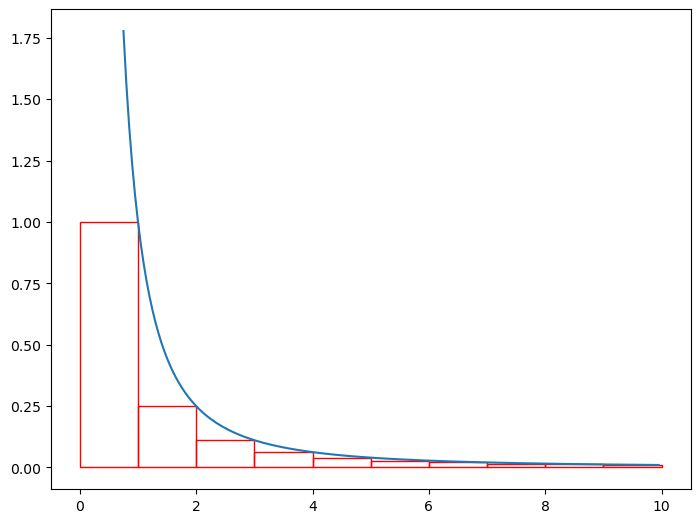

In [39]:
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

f = lambda u: 1 / u ** 2

for i in range(0, 10):
    rect = patches.Rectangle((i, 0), 1, f(i + 1), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

x = numpy.arange(0.75, 10, 0.05)
ffun = numpy.vectorize(f)
y = ffun(x)
ax.plot(x, y)

We need to be careful with where we start the integral here, because if we start it at zero, the integral will diverge. Notice there is no box in the first position anymore. We just have to switch our sum bounds and everything should work out. Since we've moved all the rectangles one unit to the left, also note that we can move the interval of our integration one unit to the left (but still starting at $1$ since w'ere excluding the first box for now), so instead of integrating from $1$ to $n+1$, we're just integrating from $1$ to $n$. Based on this information we can make the following statement:
$$\sum_{n=2}^{N} \le \int_{1}^{N} \frac{1}{x^2} dx$$
Notice that we started the sum at $n=2$ to account for the missing first box. We can account for this by just adding the first term, $a_1$, to each side:
$$a_1+\sum_{n=2}^{N} \le a_1 + \int_{1}^{N} \frac{1}{x^2} dx$$
$$\implies \sum_{n=1}^{N} \le a_1 + \int_{1}^{N} \frac{1}{x^2} dx$$
Now we can combine both results into a single compound inequality:
$$\int_{1}^{N+1}\frac{1}{x^2} dx \le \sum_{n=1}^{N} \le a_1 + \int_{1}^{N}\frac{1}{x^2} dx$$
From this statement we can clearly see that if the integral on the left diverges, than the sum must too, and if the integral on the right converges, then the sum will as well based on some inequality logic. Since the convergence/divergence of the two integrals should be functionally equivilent, we can make the statement above for the definition of the integral test.

Note that this isn't really a proof of the integral test in the general case since we're looking specifically at the case where $a_n=\frac{1}{n^2}$, but with some slight modifications to abstract away that detail, this should constitute a decent proof of the idea.

### Common Series: The P-Series
P-Series, or series of the form $\sum_{n=N}^{\infty} \frac{1}{x^p}$ are somewhat common and can be shown to converge for all values of $p > 1$ using the integral test. Using the definition of the integral test, we need to show that the following integral converges when $p > 1$:
$$\int_{N}^{\infty}\frac{1}{x^p}dx$$
The integrand can also just be expressed as $x^{-p}$, and we can take the indefinite integral of this:
$$\int x^{-p}=\frac{x^{1-p}}{1-p}$$
Then, we can take the definite integral as listed above:
$$\int_{N}^{\infty}\frac{1}{x^p}dx = \lim_{x \to \infty} \frac{x^{1-p}}{1-p} - \frac{N^{1-p}}{1-p}$$
Assuming that $p > 1$, the limit on the left goes to $0$, so we're just left with the following:
$$-\frac{N^{1-p}}{1-p}$$
This will end up being a finite, positive value, given the constraints that we have, so we have essentially proven that p-series for $p>1$ will converge using the integral test.

### Integrals, Series, and Remainders
Knowing the bounds on the remainder of a series (the difference between the partial sum and the actual value of the series) can be quite useful. It also allows for the establishment of error bounds. If we can perform the integral test on a series, we can also use some results that follow from the integral test to calculate bounds on the remainder.

To illustrate this, I'll be using the same problem from the original motivating example, particularly the following sum:
$$\sum_{n=1}^{N}\frac{1}{x^2}$$
Let's suppose that we're trying to bound the remainder for the partial sum containing the first two terms, or $s_2$. We can use the same procedure as before to get some interesting results, starting off by looking at the terms after $n=2$ with the height of the rectangle being the value of the function at its left side. We'll be looking specifically at the rectangles after $n=2$, because the sum of all the areas of all the rectangles after the first two constitute the remainder that we're trying to study.

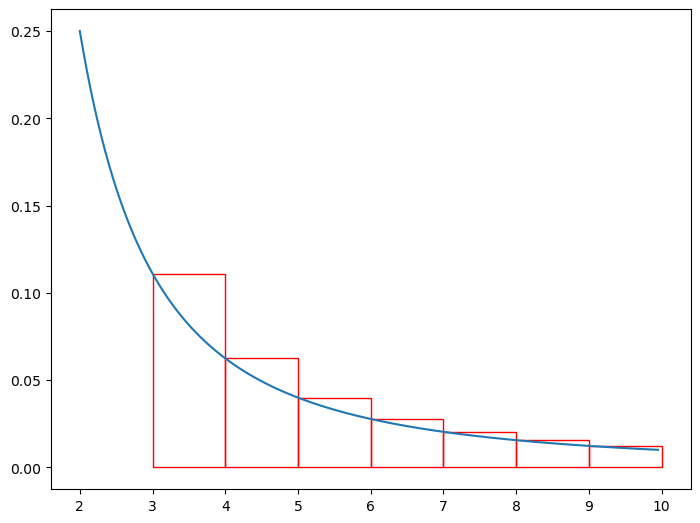

In [40]:
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

f = lambda u: 1 / u ** 2

for i in range(3, 10):
    rect = patches.Rectangle((i, 0), 1, f(i), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

x = numpy.arange(2, 10, 0.05)
ffun = numpy.vectorize(f)
y = ffun(x)
ax.plot(x, y)

(Notice that the axises have changed, and we're only looking at the rectangles from after $n=2$, starting at $n=3$).

Since the rectangles are above the line, we can say that the remainder is greater than the integral from $n=3$ to $\infty$. In a simple expression:
$$\sum_{n=3}^{\infty}=a_{3}+a_{4}+a_{5}+\cdots \ge \int_{3}^{\infty}\frac{1}{x^2}dx$$
Bounding the remainder from below can be somewhat interesting, but what we really want to be able to do is bound the the remainder from above. We can do this in similar fashion to before by just shifting all the boxes to the left by one unit, which produces the following image:

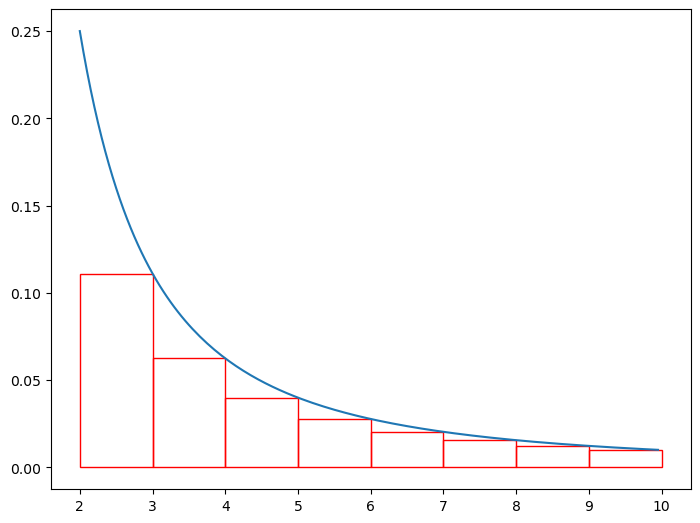

In [41]:
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

f = lambda u: 1 / u ** 2

for i in range(2, 10):
    rect = patches.Rectangle((i, 0), 1, f(i + 1), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

x = numpy.arange(2, 10, 0.05)
ffun = numpy.vectorize(f)
y = ffun(x)
ax.plot(x, y)

This image shows us that when we shift everything to the left by one unit (ie taking the integral/sum from $n=2$ to $\infty$ instead of before where were going from $n=2+1=3$ to $\infty$), the remainder is now less than the integral. We can again express this in a nice expression:
$$\sum_{n=2}^{\infty}\frac{1}{x^2}\le \int_{2}^{\infty}\frac{1}{x^2}dx$$
Combining both results into a single expression, we get the following:
$$\int_{3}^{\infty}\frac{1}{x^2}dx \le \sum_{n=2}^{\infty}\frac{1}{x^2}=R_2 \le \int_{2}^{\infty}\frac{1}{x^2}dx$$
More generally (the generalized results follow from the exact process above, I've just chosen to use actual functions to hopefully make things slightly easier to understand), we can say the following about the remainder:
$$\int_{n+1}^{\infty}f(x)dx \le R_n \le \int_{n}^{\infty}f(x)dx$$

From this, we're also able to construct error bounds and do some other interesting things. For example, we can bound the actual value of the sum, assuming we're computing a partial sum up to $n$:
$$s_n+\int_{n+1}^{\infty}f(x)dx \le s_n + R_n \le s_n + \int_{n}^{\infty}f(x)dx$$
$$\implies s_n + \int_{n+1}^{\infty}f(x)dx \le S \le s_n + \int_{n}^{\infty}f(x)dx$$
Sometimes it can be useful to write our results in the form $s_n \pm \epsilon$, with epsilon being the maximum error in either direction, implying that the actual value, $S$, is in the range $(s_n - \epsilon, s_n + \epsilon)$. To write out this result, it helps to look at a number line with some of the involved values:

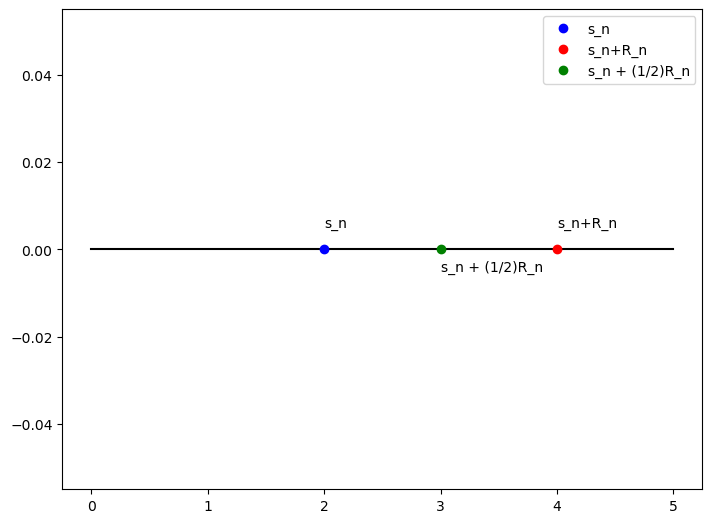

In [56]:
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot([0,5], [0,0], color='k')
ax.plot(2, 0, color='b', ls='none', marker='o', label='s_n')
ax.annotate('s_n', (2, 0.005))
ax.plot(4, 0, color='r', ls='none', marker='o', label='s_n+R_n')
ax.annotate('s_n+R_n', (4, 0.005))
ax.plot(3, 0, color='g', ls='none', marker='o', label='s_n + (1/2)R_n')
ax.annotate('s_n + (1/2)R_n', (3, -0.005))
ax.plot
ax.legend(loc='best')

In this case $R_n$ is the maximum possible remainder. So we know that the actual value, $S$, is somewhere in the range $(s_n, s_n + R_n)$. We can create the range as described earlier by setting our center point to $s_n+\frac{R_n}{2}$, and then our error is simply $\frac{R_n}{2}$. This range can be expressed as follows:
$$\left(s_n + \frac{R_n}{2} - \frac{R_n}{2}, s_n + \frac{R_n}{2} + \frac{R_n}{2}\right)$$
$$\implies \left(s_n, s_n + \frac{R_n}{2} \right)$$
$$s_n + \frac{R_n}{2} \pm \frac{R_n}{2}$$
This is definitely a pretty interesting result that can be used in a lot of cases to concisely show the error that is given. It's not wrong to say that the error is greater than these values (ie just center at $s_n$ and doing the bound as $s_n \pm R_n$), but this is a much tighter error bound in a lot of cases and thus should be preferred.